In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

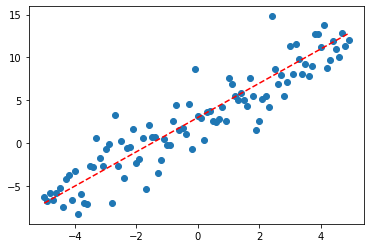

In [2]:
x = np.arange(-5, 5, 0.1)
y = 2*x + 3
y_noise = 2*np.random.normal(size = x.size)
y_data = y + y_noise

plt.scatter(x, y_data)
plt.plot(x, y, '--r')
plt.show()

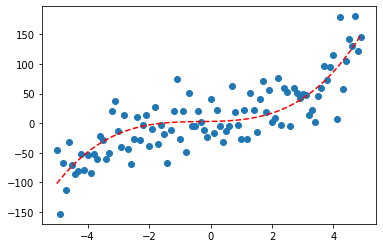

In [3]:
x = np.arange(-5, 5, 0.1)
y = 1*x**3 + 1*x**2 + 1*x + 3
y_noise = 30*np.random.normal(size = x.size)
y_data = y + y_noise

plt.scatter(x, y_data)
plt.plot(x, y, '--r')
plt.show()

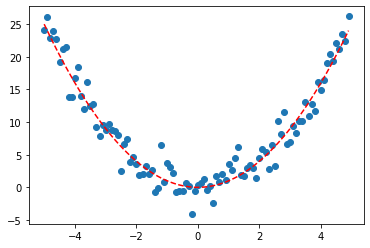

In [4]:
x = np.arange(-5, 5, 0.1)
y = x**2
y_noise = 2*np.random.normal(size = x.size)
y_data = y + y_noise

plt.scatter(x, y_data)
plt.plot(x, y, '--r')
plt.show()

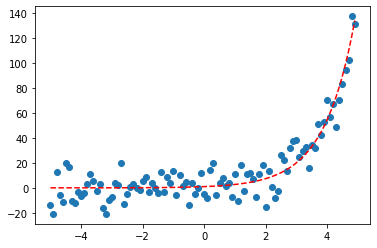

In [5]:
x = np.arange(-5, 5, 0.1)
y = np.exp(x)
y_noise = 10*np.random.normal(size = x.size)
y_data = y + y_noise

plt.scatter(x, y_data)
plt.plot(x, y, '--r')
plt.show()

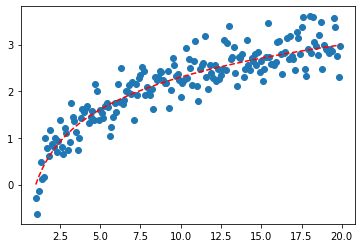

In [6]:
x = np.arange(1, 20, 0.1)
y = np.log(x)
y_noise = 0.3*np.random.normal(size = x.size)
y_data = y + y_noise

plt.scatter(x, y_data)
plt.plot(x, y, '--r')
plt.show()

# Sigmoide/Logistic Funciton

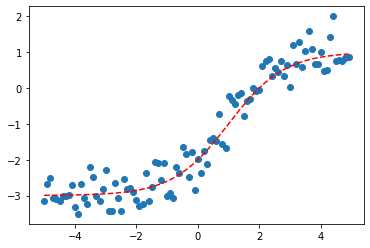

In [7]:
x = np.arange(-5, 5, 0.1)
y = 1 - 4/(1 + np.power(3, x-1))
y_noise = 0.4*np.random.normal(size = x.size)
y_data = y + y_noise

plt.scatter(x, y_data)
plt.plot(x, y, '--r')
plt.show()

# working with china GDP dataset

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

In [9]:
df = pd.read_csv('china_gdp.csv')
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


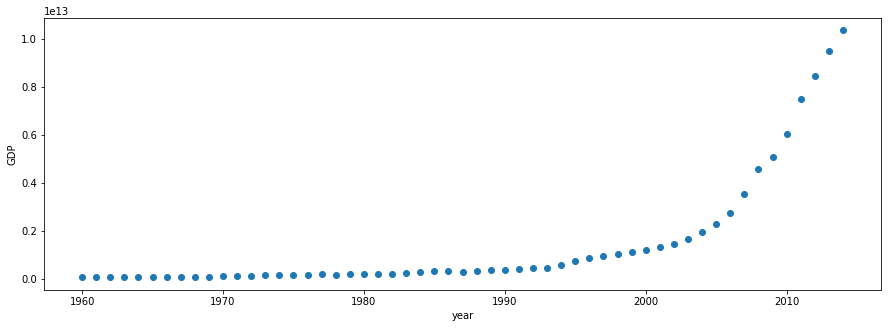

In [10]:
plt.figure(figsize=(15, 5))
x_data, y_data = df['Year'].values, df['Value'].values
plt.scatter(x_data, y_data)
plt.xlabel('year')
plt.ylabel('GDP')
plt.show()

# building the model

In [11]:
def sigmoid_func(x, beta_1, beta_2):
    y = 1/(1+np.exp( -beta_1*(x - beta_2) ))
    return y

#### the task is to optimize the betas

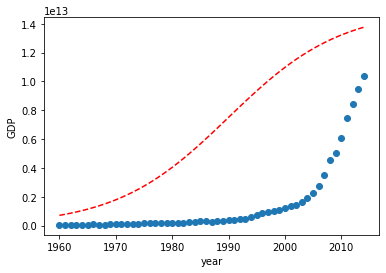

In [12]:
beta_1 = 0.1
beta_2 = 1990
Y_pred = sigmoid_func(x_data, beta_1, beta_2)*1.5e13
plt.scatter(x_data, y_data)
plt.plot(x_data, Y_pred, '--r')
plt.xlabel('year')
plt.ylabel('GDP')
plt.show()

In [23]:
xdata = x_data/np.max(x_data)
ydata = y_data/np.max(y_data)

In [24]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid_func, xdata, ydata)
print("beta_1: ", popt[0])
print("beta_2: ", popt[1])
beta_1 = popt[0]
beta_2 = popt[1]

beta_1:  690.4517118227653
beta_2:  0.9972071272524615


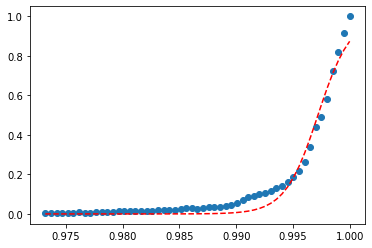

[1.52271494e+03 7.25961451e-09]
[3.90219802e+01 8.52033715e-05]


In [27]:
plt.scatter(xdata, ydata)
plt.plot(xdata, sigmoid_func(xdata, *popt), '--r')
plt.show()
perr = np.sqrt(np.diag(pcov))
print(np.diag(pcov))
print(perr)

# Practice 1: use the extended formula of sigmoid to predict the GDP vs. year

In [16]:
x_data, y_data = df['Year'], df['Value']
xdata = (x_data - np.mean(x_data))/np.std(x_data)
ydata = (y_data - np.mean(y_data))/np.std(y_data)

In [17]:
def extended_sigmoid(x, a, b, c, d):
    y = a + b/(1 + c**(x-d))
    return y

In [18]:
from scipy.optimize import curve_fit
popt_extended, pcov_extended = curve_fit(extended_sigmoid, xdata, ydata)
print('a is: ', popt_extended[0])
print('b is: ', popt_extended[1])
print('c is: ', popt_extended[2])
print('d is: ', popt_extended[3])
a, b, c, d = popt_extended[0], popt_extended[1], popt_extended[2], popt_extended[3]

a is:  -0.5089725563634927
b is:  9.898023030915676
c is:  0.033629202240405554
d is:  1.7869107072192985


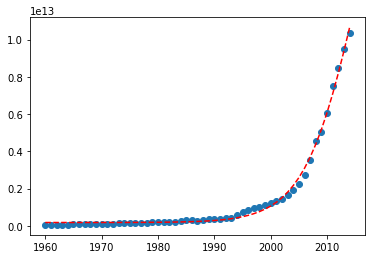

In [19]:
y_plt = extended_sigmoid(xdata, *popt_extended)
y_plt = y_plt*np.std(y_data) + np.mean(y_data)
plt.scatter(x_data, y_data)
plt.plot(x_data, y_plt, '--r')
plt.show()

In [20]:
x_test = (2021 - np.mean(x_data))/np.std(x_data)
y_test = extended_sigmoid(x_test, *popt_extended)
y_test = y_test*np.std(y_data) + np.mean(y_data)
print('China\'s GDP in 2015 will be: ', y_test)

China's GDP in 2015 will be:  19037368041740.9


In [28]:
perr_extended = np.sqrt(np.diag(pcov_extended))
print(perr_extended)

[0.01181381 1.49180612 0.00570547 0.07702176]
